In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

from astropy.io import ascii

from matplotlib.patches import Rectangle,Polygon

In [2]:
def F_nu(t_p,nu_p,F_nup,nu_sed):
    '''Calculates a Synchrotron Self-Absorbed Spectrum for given input parameters.
    
    Parameters:
    t_p (days): Time of SSA peak - should be single number
    nu_p (GHz): Frequency of SSA peak - should be single number
    F_nup (mJy): Flux of SSA peak - should be single number
    nu (GHz): Frequencies at which you want the SSA spectrum to be calculated at. Likely an array.
    
    Outputs:
    Fnu (mJy): the flux of the SSA. This is an array with values associated with each value of input array nu.
    '''
    
    m = 0.88 #using stAandard model
    p = 3.0 #using standard model
    a = (2*m)+0.5
    b = (p+5-(6*m))/2
    t=t_p
    Fnu = F_nup*1.582*(t/t_p)**a*(nu_sed/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu_sed/nu_p)**(-(p+4)/2)))
    
    return Fnu


def SSA_props(t_p,nu_p,F_nup,D,f=0.5,alpha=1,vw=100,epsilon_b=0.1):
    '''Calculates Synchroton Self-Absorption properties for given input parameters.
    
    Inputs:
    t_p (days): Time of SSA peak - likely a single number
    nu_p (GHz): Frequency of SSA peak - likely a single number
    F_nup (mJy): Flux of SSA peak - likely a single number
    D (Mpc): distance to SN - likely a single number
    f (unitless): filling factor (fraction of emitting region). default is 0.5
    alpha (unitless): ratio charged particles to magnetic field (epsilon_e/epsilon_b). default 1
    v_w (km/s): wind speed. default = 100
    epsilon_b (unitless): fraction of shock energy into B-fields. default = 0.1
    
    Outputs:
    R (cm): radius of material 
    B : magnetic field flux
    E : intermal energy of emitting material
    v (km/s): expansion velocity of material
    M (1d-5 solar masses per year): inferred mass loss rate of progenitor'''
    

    #Radius
    R = 4.0e14*(alpha)**(-1./19.)*(f/0.5)**(-1./19.)*(F_nup)**(9./19.)*(D)**(18./19.)*(nu_p/5.)**(-1)

    # Magnetic field flux
    B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

    #Internal energy of the emitting material
    E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3.)

    #expansion velocity in km/s
    v = (R/t_p)*1.1574e-10

    #pre-explosion mass-loss in 1e-5 solar mass per year
    #M = 1.0*(alpha)**(-8./19.)*(epsilon_b/0.1)*(f/0.5)**(-8./19.)*(F_nup)**(-4./19.)*(D)**(-4./19.)*(nu_p/5.)*(t_p/10.)*(vw/1000.)
    M = 1.0*(alpha)**(-8./19.)*(epsilon_b)*(f)**(-8./19.)*(F_nup)**(-4./19.)*(D)**(-4./19.)*(nu_p/5.)*(t_p/10.)*(vw/1000.)
    
   

    return R,B,E,v,M


def taufreefree(M,R,nu):
    '''Calculates the free free optical depth for a given set of parameters.
    
    Inputs:
    M (1d-5 solar masses per year): mass loss rate
    R (cm): radius of emitting material
    nu (GHz): Frequencies at which you want tau-ff to be calculated at. Likely an array.
    
    Outputs:
    tau_ff (unitless): the free-free optical depth, calculated at same frequences as input array nu'''

    Z_ave = 5.4  # Average metallicity 1= pure H. 5.4 for a massive star
    miu = 1.9 # mean molecular weight of electrons. 1= pure H  1.9 is for a massive star.
    vw_cgs = 100 * 1e5 # assumed wind velocity in cgs (cm/s). Take this as 1000 * 10^5 for now. (i.e. 1000 km/s in cgs)
    T = 10**4 # temperature of the material absorbing in K.  10^4 is a good starting point. 
        
    M_cgs =  M * 1e-5 * 6.307e+25 #mass loss rate in cgs units
    
    tau_ff = 2.021e25*M_cgs**2*Z_ave/(miu**2*nu**(2.1)*R**3*vw_cgs**2*T**(1.35))  
    
    return tau_ff

def den(M,R):
    vw_cgs = 100 * 1e5
    M_cgs =  M * 1e-5 * 6.307e+25 #mass loss rate in cgs units 
        #density of the CSM
    density = M_cgs/(4*3.142*R**2*vw_cgs)
    
    return density
#freqs,SED = F_nu(1224.288326 , 8,  0.0272)       
#R2,B2,E2,v2,M2 = SSA_props(1224.288326 , 8,  0.0272,880) 
#tauff=taufreefree(M2,R2,freqs)
#tauff=taufreefree(4,3e14,np.array([2,5,7]))
#print(freqs)
#print(tauff)
#print(R2,B2,E2,v2,M2)

## DEFINE THE PLOTS:

3.241224153698212e+16
2.6035596286802416e+16


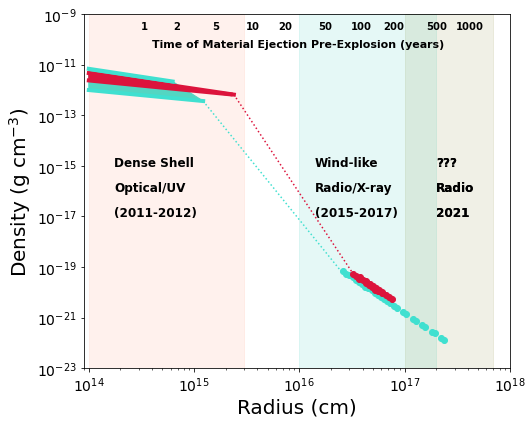

In [9]:
## DENSITY PLOT:

plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
figure, subplots = plt.subplots(1, 1, figsize=(7.5,6))
#figure.rcParams.update({'font.size': 10})


###PUT ON THE SHELL MATERIAL:

#THESE PLOTS LINES FOR THE FOUR MODELS:

#PS11aop: CSM
subplots.plot([1e14,2.39e15],[10.**(-11.33),6.6155e-13],color='crimson',linewidth=4)

#PS11aop: CSM_NI
subplots.plot([1e14,2.23e15],[10.**(-11.62),6.7397e-13],color='crimson',linewidth=4)

#PS11vo: CSM
#subplots.plot([1e14,6.26e14],[10.**(-11.16),2.1785e-12],color='turquoise',linewidth=4)

#PS11vo: CSN-NI
#subplots.plot([1e14,1.22e15],[10.**(-12),3.67668e-13],color='turquoise',linewidth=4)


#THIS WILL FILL IN THE REGION BETWEEN THE MODELS FOR PS1-11vo and PS1-11aop. 

ps11aop_x = [1e14,2.39e15,2.23e15,1e14,1e14]
ps11aop_y = [10.**(-11.33),6.6155e-13,6.7397e-13,10.**(-11.62),10.**(-11.33)]
subplots.fill(ps11aop_x,ps11aop_y,color='crimson',alpha=1,zorder=2)

#ps11vo_x = [1e14,6.26e14,1.22e15,1e14,1e14]
#ps11vo_y = [10.**(-11.16),2.1785e-12,3.67668e-13,10.**(-12),10.**(-11.16)]
#subplots.fill(ps11vo_x,ps11vo_y,color='turquoise',alpha=1,zorder=1)

#Dashed Lines connecting optical to radio:
subplots.plot([2.39e15,3.2412241537e+16],[6.6155e-13,5.5e-20],color='crimson',linestyle=':')
#subplots.plot([1.22e15,2.60355962868e+16],[3.67668e-13,5.5e-20],color='turquoise',linestyle=':')


### GET ON THE RADIO EMISSION: 

### PS1-11aop EPOCH #1:
file_in = 'PS11aop_grid_e1_allowed.csv'
data_plot = ascii.read(file_in)
D = 1070.1 # distance to SN in Mpc
date_expl = 55736.161 #inferred explosion date
date_obs = 57307.08 # date that radio obs was taken
redshift = 0.218 # redshift of object
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#

index = np.where(data_plot['RuledOut'] == 'False')[0]
data_plot2 = data_plot[index]
index2 = np.where(data_plot2['Radius'] < 7.5e16)[0]
data_plot3 = data_plot2[index2]
index3 = np.where(data_plot3['v_shock'] > 2500.)[0]
data_plot4 = data_plot3[index3]
index4 = np.where(data_plot4['Mdot'] > 0.85)[0]
data_plot5 = data_plot4[index4]
index5 = np.where(data_plot5['Mdot'] < 1.5)[0]
data_plot6 = data_plot5[index5]

#These just have the density in them already, but there is the typo from above. 
#It is directly proportional, we we plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 15})need to multiply by the correction factor: 

PS11aop_rad1 = data_plot6['Radius']
PS11aop_den1 = data_plot6['den']*(1./0.1)*(1./0.5)**(-8./19)

subplots.plot(PS11aop_rad1,PS11aop_den1,'o',color='crimson')
print(np.min(PS11aop_rad1))

###PS1-11aop e2:
D = 1070.1 # distance to SN in Mpc
date_expl = 55736.161 #inferred explosion date
date_obs = 57829.76513 # date that radio obs was taken
redshift = 0.218 # redshift of object
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#
file_in = 'PS11aop_grid_e2_allowed.csv'
data_plot = ascii.read(file_in)

index = np.where(data_plot['RuledOut'] == 'False')[0]
data_plot2 = data_plot[index]

PS11aop_rad2 = data_plot2['Radius']
PS11aop_den2 = data_plot2['den']*(1./0.1)*(1./0.5)**(-8./19)

subplots.plot(PS11aop_rad2,PS11aop_den2,'o',color='crimson')


### PS1-11vo EPOCH #1:

# date_expl = 55670.403 #inferred explosion date
# date_obs = 57306.5258# date that radio obs was taken
# redshift = 0.116 # redshift of object
# t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#
# D = 543.4
# file_in = 'PS11vo_grid_e1_allowed.csv'
# data_plot = ascii.read(file_in)

# index = np.where(data_plot['RuledOut'] == 'False')[0]
# data_plot2 = data_plot[index]
# index2 = np.where(data_plot2['v_shock'] < 20000.)[0]
# data_plot3 = data_plot2[index2]
# index3 = np.where(data_plot3['v_shock'] > 2000.)[0]
# data_plot4 = data_plot3[index3]

# PS11vo_rad1 = data_plot4['Radius']
# PS11vo_den1 = data_plot4['den']*(1./0.1)*(1./0.5)**(-8./19)

# subplots.plot(PS11vo_rad1,PS11vo_den1,'o',color='turquoise',zorder=1)

# print(np.min(PS11vo_rad1))

### SHOW THE HIGHLIGHTS OF REGIONS/LABELS: 
r1e = Rectangle((1e14,1e-24),2.9e15,9.999e-10,color='coral',alpha=0.1,zorder=1)
#r3e = Rectangle((1e16,1e-24),1.9e+17,9.999e-10,color='xkcd:turquoise',alpha=0.1,zorder=1)
#r5e = Rectangle((1e17,1e-24),6e+17,9.999e-10,color='xkcd:olive',alpha=0.1,zorder=1)
subplots.add_patch(r1e)
subplots.add_patch(r3e)
subplots.add_patch(r5e)

### Put on r^-2 wind-like environment:


subplots.set_xscale('log')
subplots.set_yscale('log')
subplots.set_xlabel(r'Radius (cm)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
subplots.set_ylabel(r'Density (g cm$^{-3}$)', fontsize=20) 
#subplots[0].title.set_text('PS1-11aop and PS1-11')   
subplots.title.set_fontsize(16) 
subplots.set_xlim(0.9e14,1e18)
subplots.set_ylim(1e-23,1e-9)


subplots.text(1.75e14,1e-15,'Dense Shell',fontsize=12,fontweight='bold')
subplots.text(1.75e14,1e-16,'Optical/UV',fontsize=12,fontweight='bold')
subplots.text(1.75e14,1e-17,'(2011-2012)',fontsize=12,fontweight='bold')


subplots.text(1.4e16,1e-15,'Wind-like',fontsize=12,fontweight='bold')
subplots.text(1.4e16,1e-16,'Radio/X-ray',fontsize=12,fontweight='bold')
subplots.text(1.4e16,1e-17,'(2015-2017)',fontsize=12,fontweight='bold')


subplots.text(2e17,1e-15,'???',fontsize=12,fontweight='bold')
subplots.text(2e17,1e-16,'Radio',fontsize=12,fontweight='bold')
subplots.text(2e17,1e-17,'2021',fontsize=12,fontweight='bold')



subplots.text(2e17,1e-15,'???',fontsize=12,fontweight='bold')
subplots.text(2e17,1e-16,'Radio',fontsize=12,fontweight='bold')
subplots.text(2e17,1e-17,'2021',fontsize=12,fontweight='bold')


#TIME AXIS MANUAL:
# subplots.text(3.1e14,2.5e-10,'1',fontsize=10,fontweight='bold')
# subplots.text(6.3e14,2.5e-10,'2',fontsize=10,fontweight='bold')
# subplots.text(1.5e15,2.5e-10,'5',fontsize=10,fontweight='bold')
# subplots.text(3.1e15,2.5e-10,'10',fontsize=10,fontweight='bold')
# subplots.text(6.3e15,2.5e-10,'20',fontsize=10,fontweight='bold')
# subplots.text(1.5e16,2.5e-10,'50',fontsize=10,fontweight='bold')
# subplots.text(3.1e16,2.5e-10,'100',fontsize=10,fontweight='bold')
# subplots.text(6.3e16,2.5e-10,'200',fontsize=10,fontweight='bold')
# subplots.text(1.6e17,2.5e-10,'500',fontsize=10,fontweight='bold')
# subplots.text(3.1e17,2.5e-10,'1000',fontsize=10,fontweight='bold')
#subplots.text(6.3e17,2.5e-10,'2000',fontsize=10,fontweight='bold')

subplots.text(4e14,5e-11,'Time of Material Ejection Pre-Explosion (years)',fontsize=11,fontweight='bold')

#bbox={'facecolor': 'k', 'alpha': 0.2, 'pad': 10}

#def rad2time(x):
#    return x/100e5/86400./365.


#def time2rad(x):
#    return x*365*86400.*100e5

#secax = subplots.secondary_xaxis('top', functions=(rad2time, time2rad))
plt.tight_layout()
plt.savefig('VLA2021A_Densities.pdf')


plt.show()
